# Logistic Regression

* a type of probabilistic statistical classification model
* 여러 속성 (1개 또는 그 이상)을 이용하여 이진적 분류 ($\in \{1, -1\}$).
* 예: 1개 독립변수에서 1개의 종속변수 분류 (이진적 명목변수nominal, 남-녀, 사망-생존)
* 독립변수에서 종속변수를 분류한다는 점에서 회귀분석과 유사함.
그러나 회귀분석은 OLS를 사용, logistic regression은 확률적인 log of odds(probability)

$logit(y)=ln(\frac{y}{1-y})=ax+b$


[[ 0.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]]
[ 19.18888889  19.90555556  20.62222222  21.33888889  22.05555556
  22.77222222  23.48888889  24.20555556  24.92222222]


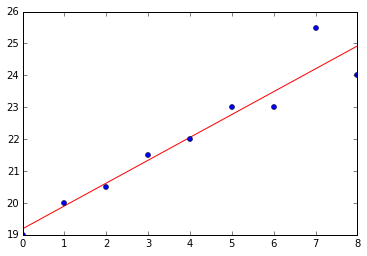

In [8]:
# source: pystat
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

xi=np.arange(0,9)
A=np.array([xi,np.ones(9)])
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]
print A.T
w=np.linalg.lstsq(A.T,y)[0]
line=w[0]*xi+w[1]
print line 
plt.plot(xi,line,'r-',xi,y,'o',markersize=5)
plt.show()


## gradient ascent algorithms

* x: 입력데이터 $\in \mathbb{R}^{m \times n}$
* y: output variables
* $(x_1,y_1),(x_2,y_2) \ldots,(x_n,y_n)$: 학습데이터

목적: h(x)와 y가 최소화하도록 $\theta$를 추정
* hypothesis
    * $h_{\theta} = \theta_0 + \theta_1x_1 + \ldots + \theta_nx_n$
    * $h_{\theta}(x)=\sum_{i=0}^n(\theta^Tx)$ (간편한 계산을 위해 $x_0=1$)
* cost function
    * $J(\theta) = \frac{1}{2} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^2$

알고리듬
* all weight vector w = 1 (random???)
* loop
    * calculate gradient
    * Update weights w := w - alpha * gradient of loss function
        * $\theta_j := \theta_j - \alpha \frac{\partial}{\partial{\theta_j}}J(\theta)$

* 위 update식을 다르게 표현하면, single training example의 경우
    * (Eq-1) $\theta_j := \theta_j - \alpha (y^{(i)}-h(x^{(i)}))x_j^{(i)}$

알고리듬에 따른 개발
1. data read
2. find parameters (gradient)
3. classify

## sigmoid

* 0,1의 결과를 smoothing함. 확률적인 값으로 활용하기 편리함.

0.73105857863


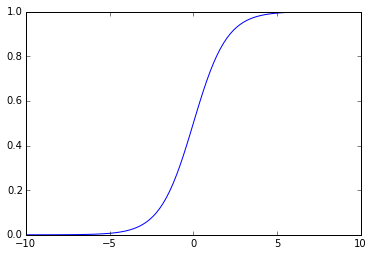

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

sigmoid=lambda(x):1.0/(1+np.exp(-x))
print sigmoid(1) #0.7310585786300049

x=np.arange(-10.,10.,0.2)
sig=sigmoid(x)
plt.plot(x,sig)
plt.show()

## gradient

* see numpy gradient
* 경사도 gradient
* hill-climbing (gradient descent)- randomly choose some items, evaluate, pick
another neigbhor
* greedy 
* 극대점을 찾기 위해서는 gradient방향으로 오르는 것을 gradient ascent
* local optimum.
* In batch learning, 학습데이터를 모두 일괄적으로 합계내어, 모델을 갱신함 (deterministic)
* In online learning mode (also called stochastic gradient descent),
데이터를 하나씩 사용하여, 모델을 갱신함. 따라서 결과가 batch와 다를 수 있슴.
* 학습율 $\alpha$

## partial derivatives

* Partial differentiation is the act of choosing one of these lines and finding its slope.
* 편미분은 변수 가운데 한 변수를 골라 나머지는 상수로 보고 미분.
* 예: $z = f(x,y) = x^2 + xy + y^2$. 
x에 대해 편미분을 하면 2x + y

In [15]:
import sympy as sp
from sympy import symbols
from sympy import solve

x,y=symbols('x y')
f=x**2 + y**2
gfx=sp.diff(f,x)
gfy=sp.diff(f,y)
print "gradient=({0},{1})".format(gfx,gfy)
print solve([gfx,gfy],[x,y])

print gfx.subs(x,1)
print gfy.subs(y,1)


gradient=(2*x,2*y)
{x: 0, y: 0}
2
2


## gradient descent

* 벡터의 gradient는 '각 변수에 대한 f의 편미분 벡터'
    * 2차원
$\nabla f(x,y)= \frac{\partial{f}}{\partial{x}},
                  \frac{\partial{f}}{\partial{y}}$
* 점에서의 gradient는 그 점에서의 기울기로서 방향, 크기를 나타냄.
* if $b = a-\gamma\nabla f(a)$ for $\gamma$ small enough,
then $F(a)\geq F(b)$.
* 예: $f(x,y) = x^2 + y^2$의 gradient를 구하면
$
\nabla f= \frac{\partial{f}}{\partial{x}},\
\frac{\partial{f}}{\partial{y}} = (2x,2y)
$
따라서 (1,1)에서 f값이 최대로 증가하는 방향은 (2,2)
그 기울기는 ||(2,2)|| = sqrt(2^2 + 2^2) = sqrt(8)
* $x_{n+1}=x_n-\gamma_n \nabla F(x_n),\ n \ge 0$이면
$F(x_0)\ge F(x_1)\ge F(x_2)\ge \cdots$이므로 결국 최소값local minimum에 도달.

$
\begin{align}
\frac{\partial}{\partial{\theta_j}}J(\theta)
    &=\frac{\partial}{\partial{\theta_j}} \frac{1}{2} (h_{\theta}(x) - y)^2\\
    &=2 \cdot \frac{1}{2} (h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (h_{\theta}(x) - y)\\
    &=(h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (\sum_{i=0}^n \theta_i x_i - y)\\
    &=(h_{\theta}(x) - y) x_j
\end{align}
$


## 1. 데이터 준비

* numpy, pandas를 이용하여 데이터 읽기
* 여기서는 교재 방식으로 읽기.

In [16]:
# does not work properly: data=pd.DataFrame.from_csv('testSet.txt',header=None,sep=r'\s+')
import os
import pandas as pd
import numpy as np

dir=os.getenv('HOME')+'/Code/git/else/machinelearninginaction/Ch05'
filename=dir+'testSet.txt'
print "Data:\n"
os.chdir(dir)
!head testSet.txt

#교재 - loadDataSet, gradAscent
import logRegres
dataList,labelList=logRegres.loadDataSet() #two lists returned
dataMat=np.mat(dataList) #(100,3) ([[1.,-0.017,14.053],[1.,-1.395,4.662]])
labelMat=np.mat(labelList).T
print labelMat[:5] #transposed shape(100,1) - matrix([[0],[1],[0],[0],[0]])

Data:

-0.017612	14.053064	0
-1.395634	4.662541	1
-0.752157	6.538620	0
-1.322371	7.152853	0
0.423363	11.054677	0
0.406704	7.067335	1
0.667394	12.741452	0
-2.460150	6.866805	1
0.569411	9.548755	0
-0.026632	10.427743	0
[[0]
 [1]
 [0]
 [0]
 [0]]


## 2. Train

In [17]:
alpha=0.001 #learning rate
maxCycles=500
m,n=dataMat.shape #(100,3)
weights=np.ones((n,1)) #(3,1) array([1.,1.,1.])
for k in range(maxCycles):
    h=sigmoid(dataMat * weights) #(100,1)
    error=(labelMat - h)
    weights = weights + alpha * dataMat.T * error  #(3,100)
print "---weights",weights
#weights=logRegres.gradAscent(dataList,labelList)
#matrix([[ 4.12414349],
#        [ 0.48007329],
#        [-0.6168482 ]])

---weights [[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


## stochastic gradient ascent

* 교재 p.94
* $\alpha$ changes

In [18]:
import random
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights
weights=stocGradAscent1(np.array(dataList),labelList)
print weights


[ 13.63343753   0.89867543  -1.85919116]


## 3. Classify


In [19]:
# textbook p.98
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0
inX=np.array([1,10,1])
print inX
print weights.shape
yhat=classifyVector(inX,weights)
print "classified results: {0}".format(yhat)


[ 1 10  1]
(3,)
classified results: 1.0


## 사례

url에서 읽어옴.

* 2 data files 
* horse-colic.data: 300 training instances
* horse-colic.test: 68 test instances
* Number of Instances: 368 (300 for training, 68 for testing)
* Number of attributes: 28
* data header가 없다
* 교재는 원본데이터를 정리하여 일부 열 제외
```
  1:  surgery
  2:  Age 
  3:  Hospital Number 
  4:  rectal temperature
  5:  pulse 
  6:  respiratory rate
  7:  temperature of extremities
  8:  peripheral pulse
  9:  mucous membranes
 10: capillary refill time
 11: pain - a subjective judgement of the horse's pain level
 12: peristalsis                              
 13: abdominal distension
 14: nasogastric tube
 15: nasogastric reflux
 16: nasogastric reflux PH
 17: rectal examination - feces
 18: abdomen
 19: packed cell volume
 20: total protein
 21: abdominocentesis appearance
 22: abdomcentesis total protein
 23: outcome
 24: surgical lesion?
 25, 26, 27: type of lesion
 28: cp_data
```

In [20]:
# 1.1 pandas reading from url
import pandas as pd
import urllib2
url0='http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
url1='http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.test'
frtrain=pd.read_csv(url0,header=None) #(300,1)
frtest=pd.read_csv(url1,header=None) #(68,1)
print frtrain[0][0] #row1
print frtest[0][0]

#1.2 numpy reading from textbook data
frtrain=os.path.join(dir,'horseColicTraining.txt')
frtest=os.path.join(dir,'horseColicTest.txt')
print "File exists? {0} {1}".format(os.path.isfile(frtrain),os.path.isfile(frtest))

x0=np.loadtxt(frtrain,delimiter='\t',skiprows=0) #(299,22)
x1=np.loadtxt(frtest,delimiter='\t',skiprows=0) #(299,22)
trainDataLabels=x0[:,-1] #(299,) 22번째 열이 class labels
trainDataArr=x0[:,range(0,21)] #(299,21)
testDataLabels=x1[:,-1] #(67,) 22번째 열이 class labels
testDataArr=x1[:,range(0,21)] #(67,21)

# 2. train
weights=stocGradAscent1(trainDataArr, trainDataLabels, 500)
print weights

# 3. classify
for i in range(10):
    inX=testDataArr[i]
    yhat=classifyVector(inX,weights)
    print "answer={0} yhat={1} testDataArr={2}".format(yhat, testDataLabels[i],testDataArr[i])


2 1 530101 38.50 66 28 3 3 ? 2 5 4 4 ? ? ? 3 5 45.00 8.40 ? ? 2 2 11300 00000 00000 2
2 1 528626 38.50 54 20 ? 1 2 2 3 4 1 2 2 5.90 ? 2 42.00 6.30 ? ? 1 2 03111 00000 00000 1
File exists? True True
[ 22.18659496  -5.59746327   4.78192069  -2.56112477   1.45551664
  -9.94870455   8.53844983 -13.93770333 -18.67571219 -16.39571798
  37.81238042 -45.14885261  50.14555407  23.74457162 -23.61959214
   7.15777674  -3.44303679  -0.53541274  -1.24815071 -13.49554945
  -5.68701462]
answer=1.0 yhat=1.0 testDataArr=[  2.    1.   38.5  54.   20.    0.    1.    2.    2.    3.    4.    1.
   2.    2.    5.9   0.    2.   42.    6.3   0.    0. ]
answer=1.0 yhat=1.0 testDataArr=[  2.    1.   37.6  48.   36.    0.    0.    1.    1.    0.    3.    0.
   0.    0.    0.    0.    0.   44.    6.3   1.    5. ]
answer=0.0 yhat=1.0 testDataArr=[  1.    1.   37.7  44.   28.    0.    4.    3.    2.    5.    4.    4.
   1.    1.    0.    3.    5.   45.   70.    3.    2. ]
answer=0.0 yhat=0.0 testDataArr=[  1.   1. 

## simple linear regression

선형회귀 Error의 gradient를 w,b에 대해 구하면:

* $J(\theta)$ $Error=\frac{1}{n} \sum_{i=1}^n(y_i - (ax_i+b))^2$
* $\frac{\partial}{\partial{a}}
    =\frac{2}{n} \sum_{i=1}^n(y_i - (ax_i+b)) (-x_i)$
* $\frac{\partial}{\partial{b}}
    =\frac{2}{n} \sum_{i=1}^n(y_i - (ax_i+b))$    

data source: http://en.wikipedia.org/wiki/Simple_linear_regression

$
\begin{align}
\hat{a} &= \frac{nS_{xy}-S_xS_y}{nS_{xx}-S_x^2} = 61.272 \\
\hat{b} &= \frac{1}{n}S_y - \hat{a} \frac{1}{n}S_x = -39.062
\end{align}
$


iter:0 a=1.11054172635 b=0.327309732404 AvgError=3634.6958642
iter:500 a=48.2755674865 b=-28.0240406564 AvgError=111.03242341
iter:1000 a=56.4793753563 b=-32.9367625012 AvgError=3.96944458639
iter:1500 a=57.8916786432 b=-33.7636611479 AvgError=0.717966007211
iter:2000 a=58.1200216588 b=-33.8781481968 AvgError=0.620763404814
iter:2500 a=58.1418619812 b=-33.8682460288 AvgError=0.619424089363
iter:3000 a=58.1275806546 b=-33.8364521448 AvgError=0.621020230814
iter:3500 a=58.106876141 b=-33.8006315525 AvgError=0.622728588827
iter:4000 a=58.0849243303 b=-33.7638968481 AvgError=0.624463704707
iter:4500 a=58.0626265437 b=-33.7267891051 AvgError=0.626223310264
iter:5000 a=58.0401389909 b=-33.689401141 AvgError=0.628007669626
iter:5500 a=58.0174879935 b=-33.6517476266 AvgError=0.629817128548
iter:6000 a=57.994677226 b=-33.6138296004 AvgError=0.631652040016
iter:6500 a=57.971706409 b=-33.5756457141 AvgError=0.633512762052
iter:7000 a=57.948574567 b=-33.5371941924 AvgError=0.635399657718
iter:7500

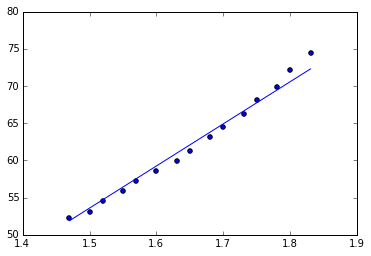

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

import random
alpha=0.001

x=[1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68,\
   1.70, 1.73, 1.75, 1.78, 1.80, 1.83]
y=[52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29,\
   63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46]

def computeAvgError(a,b,x,y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (a * x[i] + b)) ** 2
    return totalError / float(len(x))

#x: attribute, 1d float array
#y: class, 1d int array
#alpha: learning rate

def GradientDescent(x,y,alpha,iter):
    a=random.random()
    b=random.random()
    n=len(x)
    for j in range(iter):
        aGradient = 0
        bGradient = 0
        for i in range(n):
            aGradient += (2./n) * (y[i] - ((a * x[i]) + b))*(-x[i])
            bGradient += (2./n) * (y[i] - ((a * x[i]) + b))
        a = a - (alpha * aGradient)
        b = b - (alpha * bGradient)
        if(j%500==0):
            print "iter:{0} a={1} b={2} AvgError={3}".format(j,a,b,computeAvgError(a,b,x,y))
    return a, b

#x,y=genData(100,1,1)
a,b=GradientDescent(x,y,alpha,30000)
yhat=[]
for i in range(len(x)):
    yhat.append(a*x[i]+b)
    print "i{0} x={1} y={2} yhat={3}".format(i,x[i],y[i],yhat[i])
error=computeAvgError(a,b,x,y)
print "y={0}x+{1}, error={2}".format(a,b,error)

plt.scatter(x,y)
plt.plot(x,yhat)
plt.show()